In [1]:
import os
from glob import glob
import pandas as pd
import numpy as np
import dask.dataframe as dd
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc, dates
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

* 불러오기

In [2]:
path = os.getcwd()
site_list = sorted(glob(os.path.join(path,"data","sensing_data","*")))
site_list = list(map(os.path.basename,site_list))
print(path)
print(site_list)

c:\Users\Go\OneDrive - UOS\allrepos\multi_agent_awac
['남부', '동화나라', '소리엘', '솜사탕', '예나']


In [3]:
site = "솜사탕"
time_mean = "5T"
csv_by_site_det = []


structure = sorted(glob(os.path.join(path,"data","sensing_data",site,'*')))
structure = list(map(os.path.basename,structure))
for j in structure:
        temp_data = dd.read_csv(os.path.join(path,"data","sensing_data",site,j),encoding='cp949').compute()
        temp_data['T/D'] = pd.to_datetime(temp_data['T/D'])
       
        temp_data.set_index('T/D',inplace=True)
        temp_data = temp_data.resample(time_mean,).mean()
        temp_data['site_details'] = j
        csv_by_site_det.append(temp_data)

data = pd.concat(csv_by_site_det)
data.columns = ['index','temp','hum','pm1','pm2.5','pm4','pm10','co2','tvoc','site_details']
data = data[['temp','hum','pm1','pm2.5','pm4','pm10','co2','tvoc','site_details']]

* 라벨링

In [4]:
# structure
# site_de = "솜사탕_거실.csv"
# data[data.site_details == site_de]
data['vent'] = 0
data['people'] = 0

data.loc[data.between_time('12:00:00', '18:00:00',include_end=False).index,['vent']] = 1
data.loc[data.between_time('9:00:00', '16:00:00',include_end=False).index,['people']] = 1

#0부터 월요일
data.loc[data[data.index.dayofweek == 5].index,['vent']] = 0
data.loc[data[data.index.dayofweek == 5].index,['people']] = 0

data.loc[data[data.index.dayofweek == 6].index,['vent']] = 0
data.loc[data[data.index.dayofweek == 6].index,['people']] = 0

In [5]:
data.iloc[-20:,:]

,temp,hum,pm1,pm2.5,pm4,pm10,co2,tvoc,site_details,vent,people
T/D,,,,,,,,,,,
2022-03-25 14:35:00,27.790600,31.227500,12.289400,13.118000,13.217167,13.236967,1276.696267,0.0,솜사탕_부엌.csv,1,1
2022-03-25 14:40:00,27.810400,31.240233,12.217400,13.036867,13.131767,13.150867,1264.217467,0.0,솜사탕_부엌.csv,1,1
2022-03-25 14:45:00,27.874967,32.121300,11.862500,12.582200,12.613100,12.619233,1349.166467,0.0,솜사탕_부엌.csv,1,1
2022-03-25 14:50:00,27.941267,33.019567,11.121633,11.828067,11.882667,11.893533,1502.311433,0.0,솜사탕_부엌.csv,1,1
2022-03-25 14:55:00,27.950600,33.193700,10.773000,11.536300,11.653067,11.676567,1547.987133,0.0,솜사탕_부엌.csv,1,1
2022-03-25 15:00:00,27.991867,33.330767,10.045933,10.674033,10.714833,10.723267,1578.884633,0.0,솜사탕_부엌.csv,1,1
2022-03-25 15:05:00,28.025367,33.638833,9.566467,10.189867,10.249367,10.261467,1618.406300,0.0,솜사탕_부엌.csv,1,1
2022-03-25 15:10:00,28.050233,33.530933,9.544300,10.194800,10.277333,10.293867,1635.439000,0.0,솜사탕_부엌.csv,1,1
2022-03-25 15:15:00,28.043867,33.297733,8.882667,9.468733,9.529733,9.541967,1649.913033,0.0,솜사탕_부엌.csv,1,1


# CO2 강화학습 데모

* offline learning

In [6]:
import gym
import torch

from src.Learner.AWAC import AWAC
from src.Learner.DQN import DQN
from src.Learner.Random import DiscreteRandomAgent
from src.nn.MLP import MLP
from src.utils.memory import ReplayMemory
from src.utils.train_utils import prepare_training_inputs

import matplotlib.pyplot as plt 

In [7]:
data_co2 = data.loc[:,['co2','site_details','vent','people']]

In [8]:
data_co2

,co2,site_details,vent,people
T/D,,,,
2021-12-30 12:10:00,1071.770429,솜사탕_거실.csv,1,1
2021-12-30 12:15:00,NaN,솜사탕_거실.csv,1,1
2021-12-30 12:20:00,NaN,솜사탕_거실.csv,1,1
2021-12-30 12:25:00,NaN,솜사탕_거실.csv,1,1
2021-12-30 12:30:00,NaN,솜사탕_거실.csv,1,1
...,...,...,...,...
2022-03-25 15:50:00,1515.878367,솜사탕_부엌.csv,1,1
2022-03-25 15:55:00,1535.872233,솜사탕_부엌.csv,1,1
2022-03-25 16:00:00,1545.784667,솜사탕_부엌.csv,1,0


* offline dataset 생성

In [9]:
room_name = '솜사탕_거실.csv'

dataset = data_co2[data_co2.site_details == room_name][['co2','vent','people']]
print(room_name)
# dataset.fillna(method='ffill')

솜사탕_거실.csv


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24541 entries, 2021-12-30 12:10:00 to 2022-03-25 17:10:00
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   co2     22679 non-null  float64
 1   vent    24541 non-null  int64  
 2   people  24541 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 766.9 KB


Wall time: 362 ms


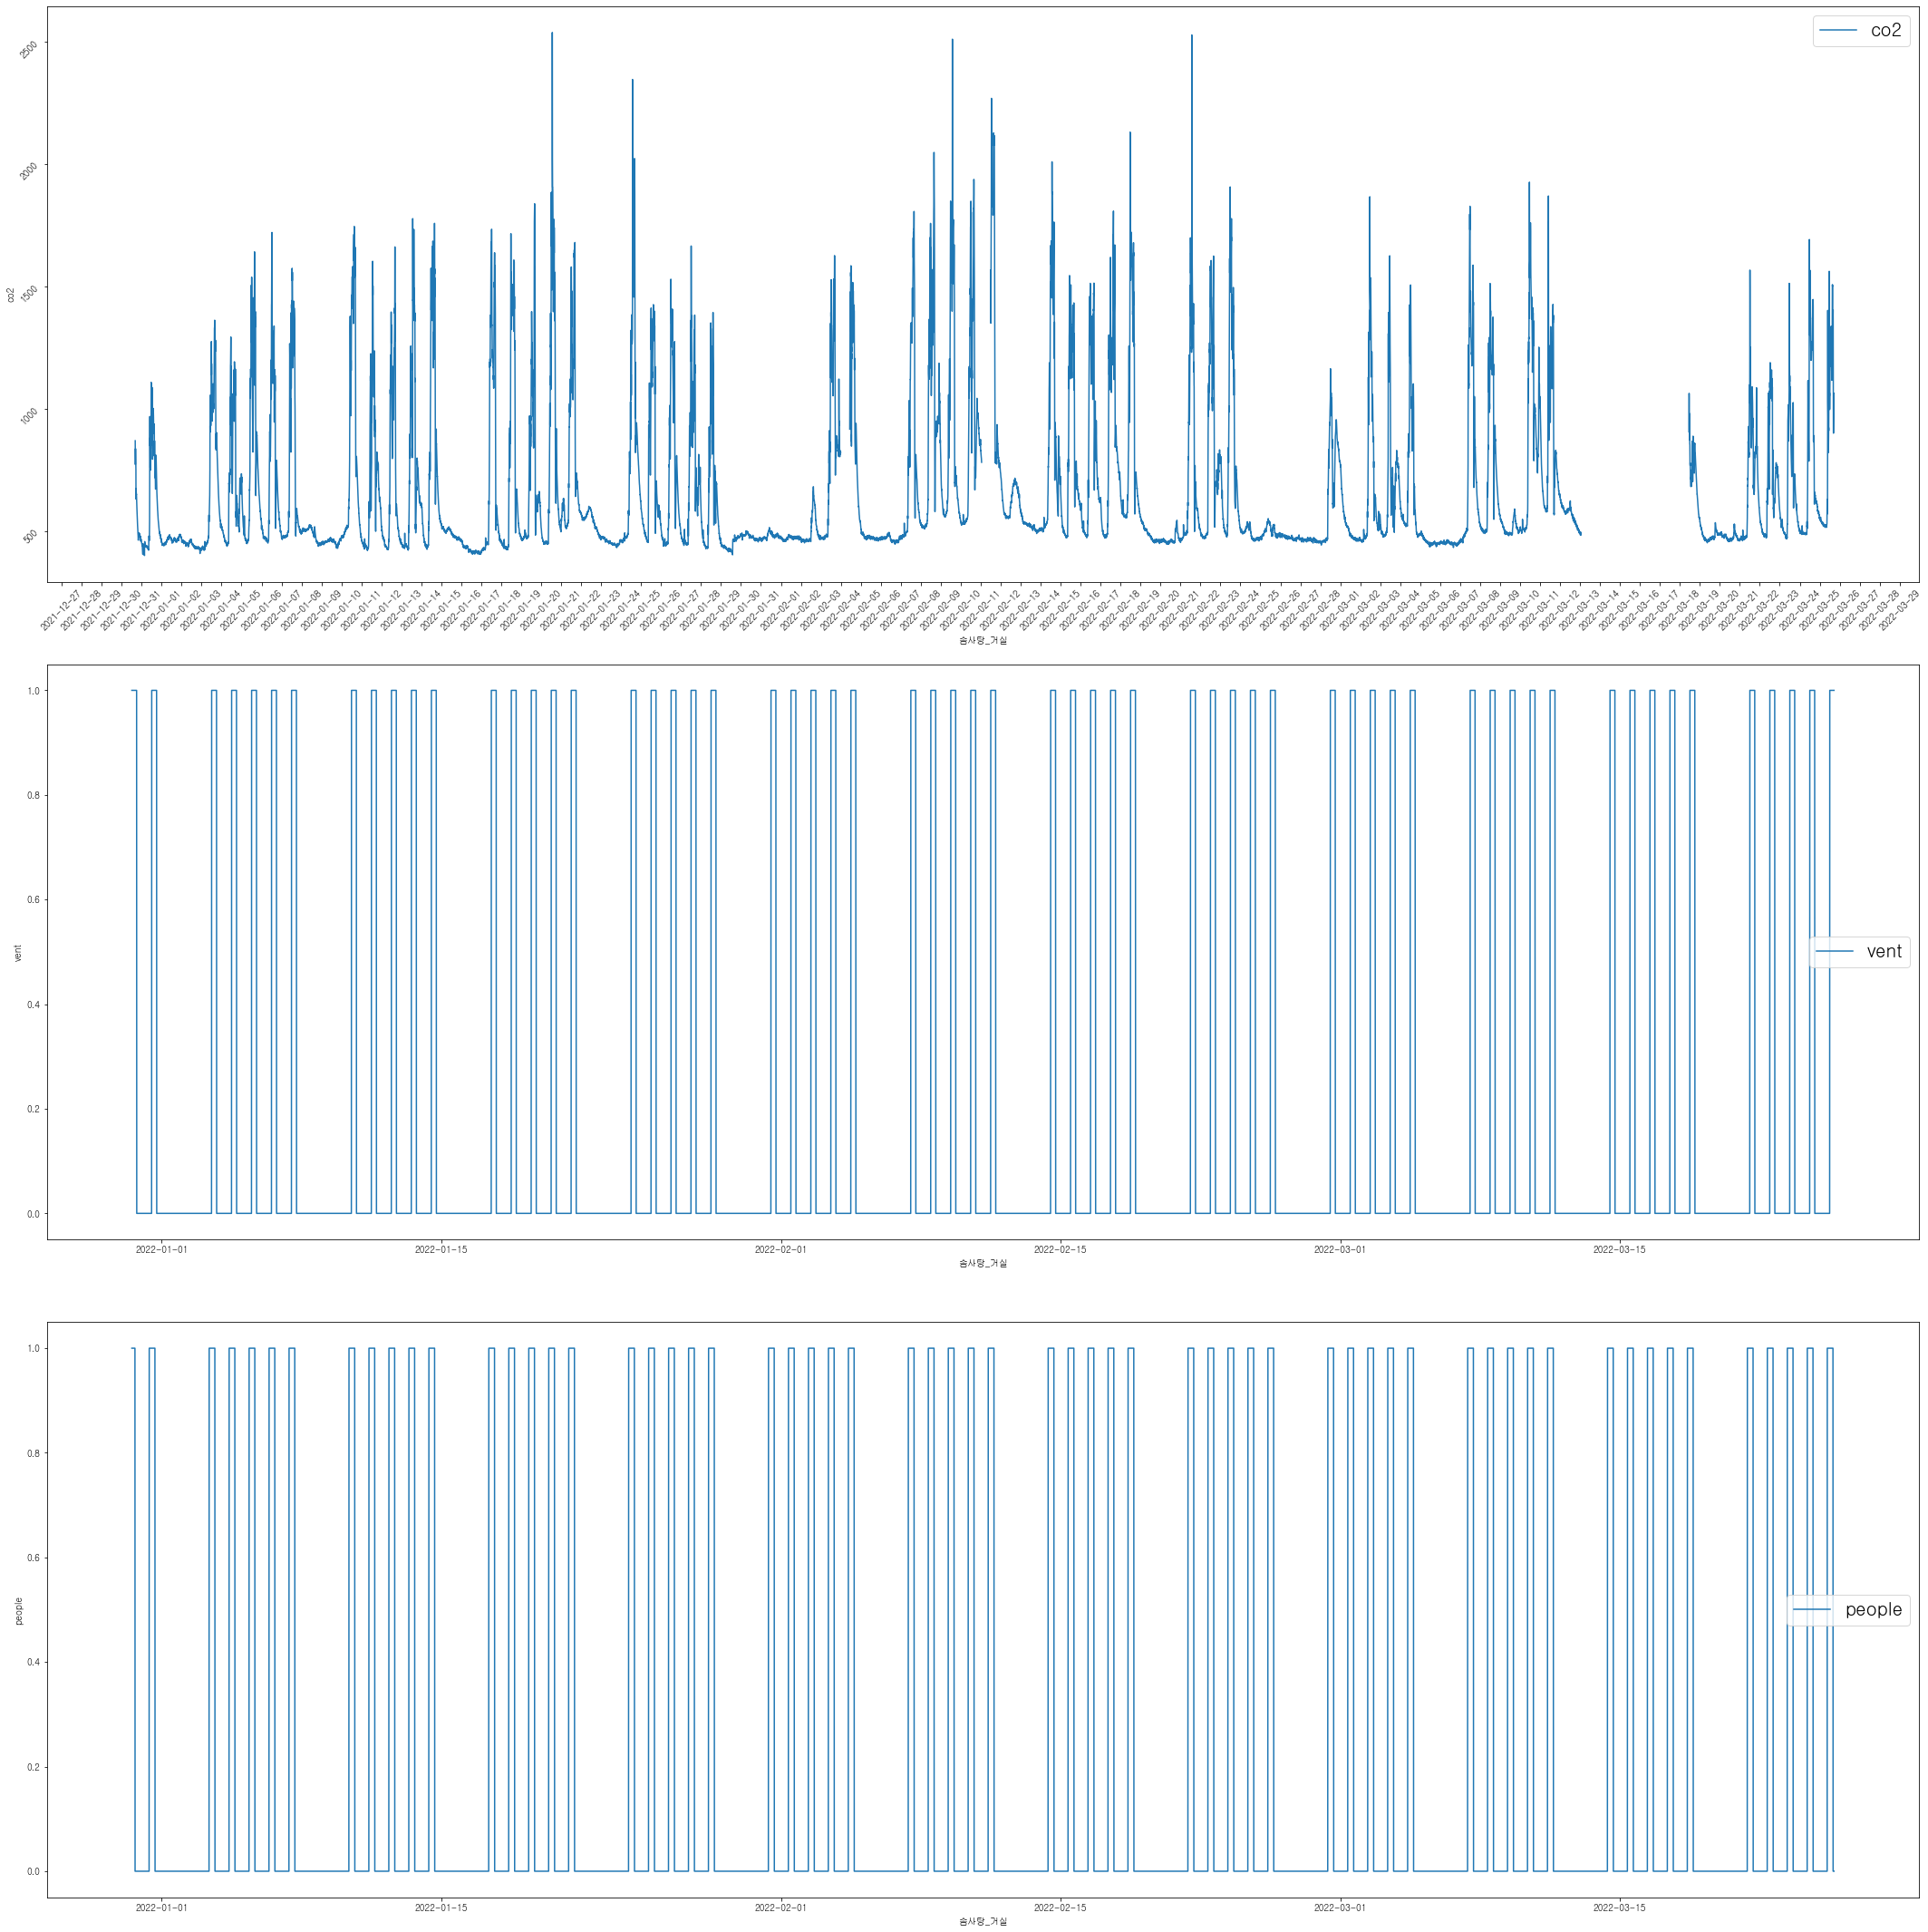

In [11]:
%%time
fig, axes = plt.subplots(3,1, figsize=(30,30))
# mean_by_date.loc[:,val].plot()
plt.rc('font', size=20)        # 기본 폰트 크기
# plt.rc('axes', labelsize=20)   # x,y축 label 폰트 크기
plt.rc('xtick', labelsize=15)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=20)  # y축 눈금 폰트 크기
plt.rc('legend', fontsize=20)  # 범례 폰트 크기
plt.rc('figure', titlesize=20)




axes[0].plot(dataset['co2'], label = 'co2')
axes[0].set_ylabel('co2')
axes[0].legend()
axes[0].set_xlabel("솜사탕_거실")
axes[0].tick_params(labelrotation=45)
axes[0].xaxis.set_major_locator(dates.DayLocator())

axes[1].plot(dataset['vent'], label = 'vent')
axes[1].set_ylabel('vent')
axes[1].legend()
axes[1].set_xlabel("솜사탕_거실")
axes[0].tick_params(labelrotation=45)
axes[0].xaxis.set_major_locator(dates.DayLocator())

axes[2].plot(dataset['people'], label = 'people')
axes[2].set_ylabel('people')
axes[2].legend()
axes[2].set_xlabel("솜사탕_거실")
axes[0].tick_params(labelrotation=45)
axes[0].xaxis.set_major_locator(dates.DayLocator())

fig.tight_layout()

* 중간중간 결측치와 휴무일이 있는 것으로 판단됨
* 없는 구간으로 피해서 학습
* 1월 2일부터 1월 27일까지만 학습데이터로 사용한다
* 2월 13일부터 2월 23일까지만 검증데이터로 사용한다

In [12]:
def reward_co2(co2):
    reward = np.exp(-((co2-900)**2)/(2*350**2))
    return reward

In [13]:
# dataset
train_data = dataset.loc['2022-01-02':'2022-01-27']
test_data = dataset.loc['2022-02-13':'2022-02-28']

In [14]:
train_data['co2_t+1'] = train_data['co2'].shift(-1)
train_data['people_t+1'] = train_data['people'].shift(-1)
train_data['reward'] = train_data['co2_t+1'].map(lambda x : reward_co2(x))
# train_data = train_data.dropna(axis=0)
train_data['done'] = False
train_data.loc[train_data.between_time('00:00:00', '00:05:00',include_end=False).index,['done']] = True
train_data = train_data.iloc[:-1,:]
train_data

C:\Users\Go\miniconda3\envs\pro1\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Go\miniconda3\envs\pro1\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Go\miniconda3\envs\pro1\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

,co2,vent,people,co2_t+1,people_t+1,reward,done
T/D,,,,,,,
2022-01-02 00:00:00,462.060733,0,0,460.514267,0.0,0.454591,True
2022-01-02 00:05:00,460.514267,0,0,456.254067,0.0,0.447662,False
2022-01-02 00:10:00,456.254067,0,0,453.917000,0.0,0.443879,False
2022-01-02 00:15:00,453.917000,0,0,455.474033,0.0,0.446398,False
2022-01-02 00:20:00,455.474033,0,0,458.786000,0.0,0.451775,False
...,...,...,...,...,...,...,...
2022-01-27 23:30:00,645.001633,0,0,637.205733,0.0,0.754364,False
2022-01-27 23:35:00,637.205733,0,0,625.755600,0.0,0.735666,False
2022-01-27 23:40:00,625.755600,0,0,611.970567,0.0,0.712756,False


In [15]:
test_data['co2_t+1'] = test_data['co2'].shift(-1)
test_data['people_t+1'] = test_data['people'].shift(-1)
test_data['reward'] = test_data['co2_t+1'].map(lambda x : reward_co2(x))
# test_data = test_data.dropna(axis=0)
test_data['done'] = False
test_data.loc[test_data.between_time('00:00:00', '00:05:00',include_end=False).index,['done']] = True
test_data = test_data.iloc[:-1,:]
test_data

C:\Users\Go\miniconda3\envs\pro1\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Go\miniconda3\envs\pro1\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Go\miniconda3\envs\pro1\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

,co2,vent,people,co2_t+1,people_t+1,reward,done
T/D,,,,,,,
2022-02-13 00:00:00,582.334967,0,0,584.266200,0.0,0.665718,True
2022-02-13 00:05:00,584.266200,0,0,578.114900,0.0,0.655145,False
2022-02-13 00:10:00,578.114900,0,0,580.077833,0.0,0.658523,False
2022-02-13 00:15:00,580.077833,0,0,583.893967,0.0,0.665079,False
2022-02-13 00:20:00,583.893967,0,0,576.346867,0.0,0.652101,False
...,...,...,...,...,...,...,...
2022-02-28 23:30:00,783.679333,0,0,784.198933,0.0,0.946737,False
2022-02-28 23:35:00,784.198933,0,0,783.133100,0.0,0.945779,False
2022-02-28 23:40:00,783.133100,0,0,780.528300,0.0,0.943405,False


In [16]:
train_data.loc['2022-01-18 12:00:00':'2022-01-18 16:00:00']

,co2,vent,people,co2_t+1,people_t+1,reward,done
T/D,,,,,,,
2022-01-18 12:00:00,1542.640300,1,1,1544.004267,1.0,0.183999,False
2022-01-18 12:05:00,1544.004267,1,1,1558.511200,1.0,0.170342,False
2022-01-18 12:10:00,1558.511200,1,1,1452.220400,1.0,0.288032,False
2022-01-18 12:15:00,1452.220400,1,1,1324.221200,1.0,0.479723,False
2022-01-18 12:20:00,1324.221200,1,1,1388.708167,1.0,0.377253,False
2022-01-18 12:25:00,1388.708167,1,1,1412.851700,1.0,0.341797,False
2022-01-18 12:30:00,1412.851700,1,1,1434.193733,1.0,0.312002,False
2022-01-18 12:35:00,1434.193733,1,1,1458.317633,1.0,0.280181,False
2022-01-18 12:40:00,1458.317633,1,1,1450.673433,1.0,0.290045,False


* 메모리 생성

In [17]:
memory_size = 500000
memory = ReplayMemory(memory_size)
gamma = 0.9

In [18]:
for i, val in enumerate(train_data.values):
    s = torch.tensor([val[0],val[2]]).view(1,2)
    a = torch.tensor([val[1]]).view(1,1)
    r = torch.tensor([val[5]]).view(1,1)
    ns = torch.tensor([val[3],val[4]]).view(1,2)
    done = torch.tensor([val[6]]).view(1,1)

    experience = (s,a,r,ns,done)
    memory.push(experience)

In [19]:
memory.sample(100)

[(tensor([[931.1537,   1.0000]]),
  tensor([[0]]),
  tensor([[0.9882]]),
  tensor([[846.0352,   1.0000]]),
  tensor([[False]])),
 (tensor([[905.8204,   1.0000]]),
  tensor([[0]]),
  tensor([[0.9527]]),
  tensor([[1.0090e+03, 1.0000e+00]]),
  tensor([[False]])),
 (tensor([[448.5378,   0.0000]]),
  tensor([[0]]),
  tensor([[0.4402]]),
  tensor([[451.6115,   0.0000]]),
  tensor([[False]])),
 (tensor([[435.5993,   0.0000]]),
  tensor([[0]]),
  tensor([[0.4167]]),
  tensor([[436.9162,   0.0000]]),
  tensor([[False]])),
 (tensor([[491.2527,   0.0000]]),
  tensor([[0]]),
  tensor([[0.4990]]),
  tensor([[487.3242,   0.0000]]),
  tensor([[False]])),
 (tensor([[459.9118,   0.0000]]),
  tensor([[0]]),
  tensor([[0.4474]]),
  tensor([[456.1033,   0.0000]]),
  tensor([[False]])),
 (tensor([[560.0148,   0.0000]]),
  tensor([[0]]),
  tensor([[0.6130]]),
  tensor([[553.7574,   0.0000]]),
  tensor([[False]])),
 (tensor([[519.1043,   0.0000]]),
  tensor([[0]]),
  tensor([[0.5530]]),
  tensor([[519.0182,

* 오프라인 트레이닝

fitting [0] / [10]
Wall time: 1.1 s


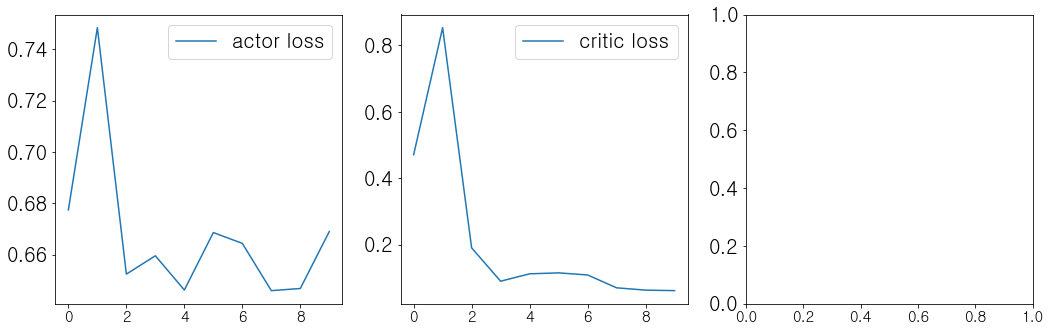

In [92]:
%%time
batch_size = 1024
n_updates = 1000
fit_device = 'cuda' if torch.cuda.is_available() else 'cpu'

qnet = MLP(2, 2, 
           num_neurons=[128,256,512,256,128,64,32], 
           out_act='ReLU')
qnet_target = MLP(2, 2, 
                  num_neurons=[128,256,512,256,128,64,32], 
                  out_act='ReLU')
pi = MLP(2, 2, num_neurons=[128,256,512,256,128,64,32])
use_adv = True

agent = AWAC(critic=qnet, 
             critic_target=qnet_target,
             actor=pi, 
             gamma=gamma, 
             lam=1.0, 
             num_action_samples=3,
             use_adv=use_adv)

agent.to(fit_device)
critic_losses, actor_losses = [], []
for i in range(n_updates):
    if i % 1000 == 0:
        print("fitting [{}] / [{}]".format(i, n_updates))
    sampled_exps = memory.sample(batch_size)
    s, a, r, ns, done = prepare_training_inputs(sampled_exps, 
                                                device=fit_device)    
    critic_loss = agent.update_critic(s,a,r,ns,done)
    actor_loss = agent.update_actor(s,a)
    critic_losses.append(critic_loss.detach())
    actor_losses.append(actor_loss.detach())        
agent.to('cpu')

# num_runs = 1000
# awac_cum_rs = []
# for n_epi in range(num_runs):
#     s = env.reset()
#     cum_r = 0

#     #어떠한 성능 기준치 이상일경우 카운트되도록
#     while True:
#         s = torch.tensor((s,), dtype=torch.float)
#         a = int(agent.get_action(s).squeeze())
#         ns, r, done, info = env.step(a)

#         s = ns
#         cum_r += 1
#         if done:
#             awac_cum_rs.append(cum_r)
#             break


fig, axes = plt.subplots(1,3, figsize=(15,5))
axes[0].plot(actor_losses, label='actor loss')
axes[0].legend()
axes[1].plot(critic_losses, label='critic loss')
axes[1].legend()
# axes[2].hist(cum_rs, density=True, label='expert')
# axes[2].legend()
# axes[2].hist(awac_cum_rs, 
#          alpha=0.5, 
#          density=True, label='offline')
# axes[2].legend()
fig.tight_layout()

In [83]:
s2 = torch.tensor([1100.6666,1]).view(1,2)
agent.actor(s2)

tensor([[-0.6725, -0.3126]], grad_fn=<AddmmBackward0>)

In [84]:
np.argmax(agent.actor(s2).squeeze().detach().numpy())

1

* 하루 지정해서 벤틸레이션 확인
* environment를 정의하지 않았기 때문에 그냥 확인용
* agent에 의한 action으로 state가 어떤식으로 바뀔지는 아직 알 수 없음

In [85]:
temp_data = test_data.loc['2022-02-12 00:00:00':'2022-02-16 00:00:00']
temp_data['agent_action'] = 0

for i, val in enumerate(temp_data.values):
    s = torch.tensor([val[0],val[2]]).view(1,2)
    ag_action = np.argmax(agent.actor(s).squeeze().detach().numpy())
    temp_data.loc[temp_data.index[i],'agent_action'] = ag_action

C:\Users\Go\miniconda3\envs\pro1\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [86]:
temp_data

,co2,vent,people,co2_t+1,people_t+1,reward,done,agent_action
T/D,,,,,,,,
2022-02-13 00:00:00,582.334967,0,0,584.266200,0.0,0.665718,True,0
2022-02-13 00:05:00,584.266200,0,0,578.114900,0.0,0.655145,False,0
2022-02-13 00:10:00,578.114900,0,0,580.077833,0.0,0.658523,False,0
2022-02-13 00:15:00,580.077833,0,0,583.893967,0.0,0.665079,False,0
2022-02-13 00:20:00,583.893967,0,0,576.346867,0.0,0.652101,False,0
...,...,...,...,...,...,...,...,...
2022-02-15 23:40:00,593.036133,0,0,594.042033,0.0,0.682439,False,0
2022-02-15 23:45:00,594.042033,0,0,594.836400,0.0,0.683792,False,0
2022-02-15 23:50:00,594.836400,0,0,590.045267,0.0,0.675616,False,0


Wall time: 109 ms


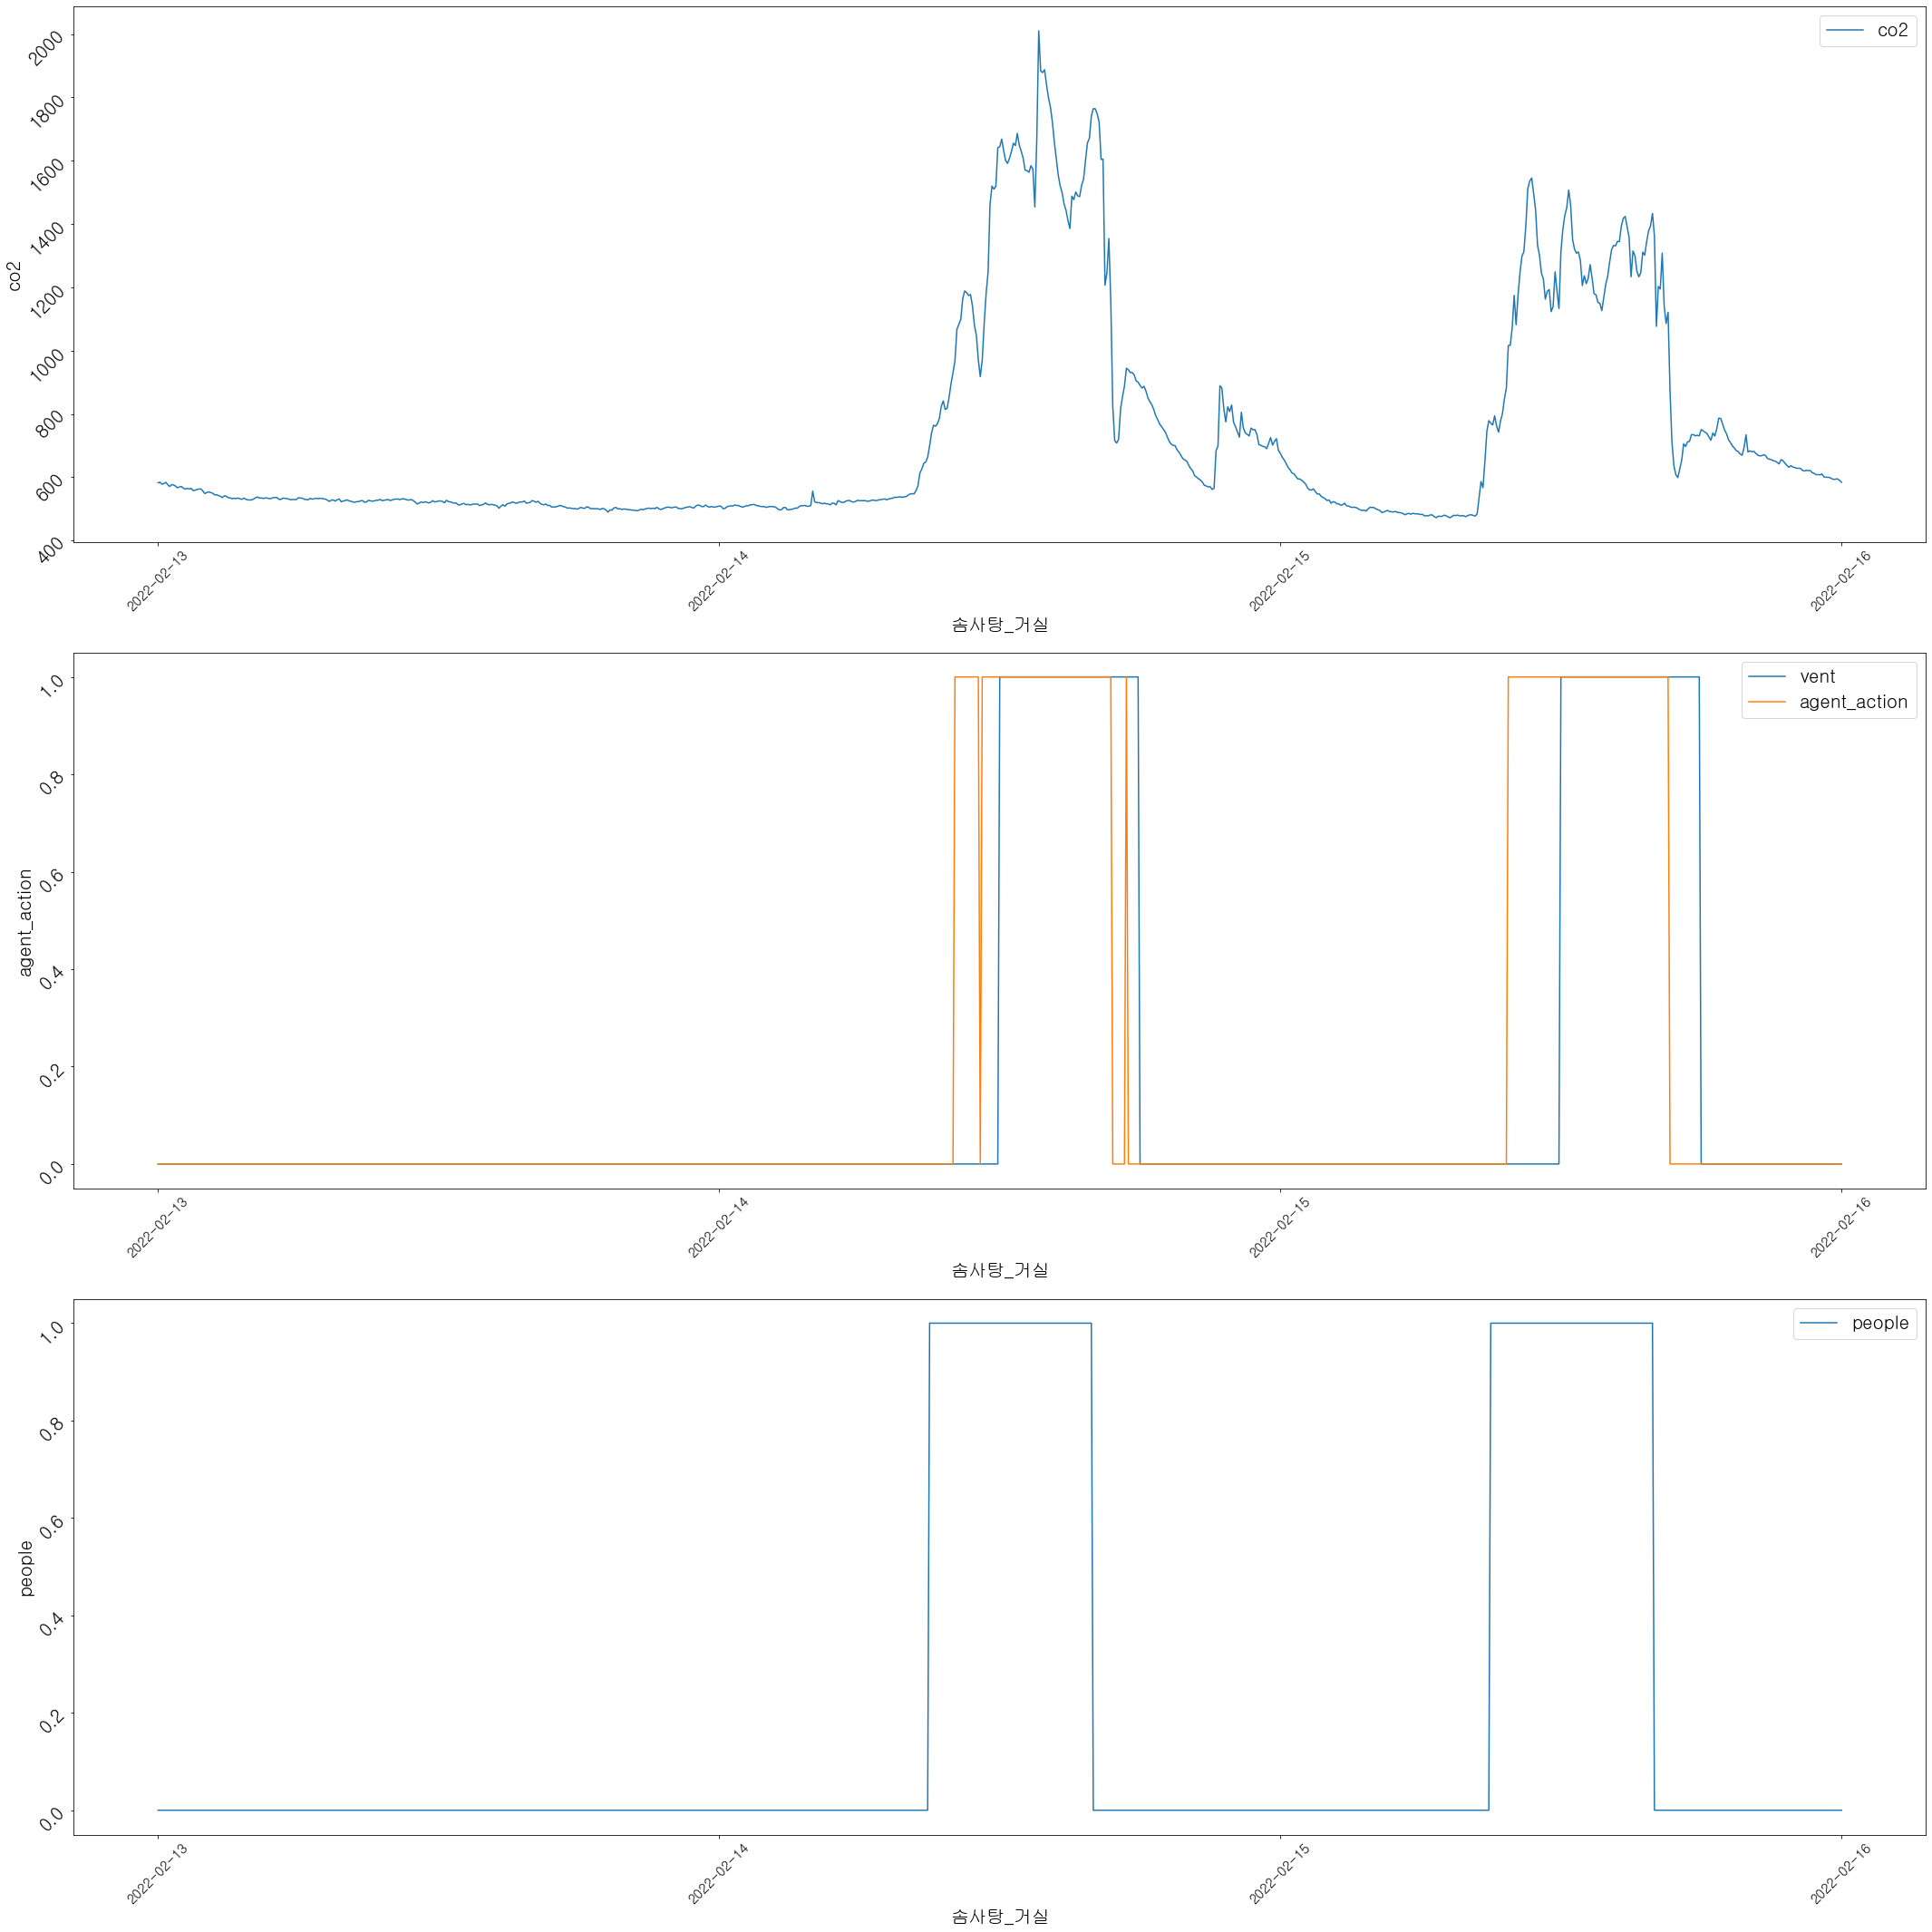

In [87]:
%%time
fig, axes = plt.subplots(3,1, figsize=(30,30))
# mean_by_date.loc[:,val].plot()
plt.rc('font', size=20)        # 기본 폰트 크기
# plt.rc('axes', labelsize=20)   # x,y축 label 폰트 크기
plt.rc('xtick', labelsize=15)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=20)  # y축 눈금 폰트 크기
plt.rc('legend', fontsize=20)  # 범례 폰트 크기
plt.rc('figure', titlesize=20)

axes[0].plot(temp_data['co2'], label = 'co2')
axes[0].set_ylabel('co2')
axes[0].legend()
axes[0].set_xlabel("솜사탕_거실")
axes[0].tick_params(labelrotation=45)
axes[0].xaxis.set_major_locator(dates.DayLocator())

axes[1].plot(temp_data['vent'], label = 'vent')
axes[1].set_ylabel('vent')
axes[1].legend()
axes[1].set_xlabel("솜사탕_거실")
axes[1].tick_params(labelrotation=45)
axes[1].xaxis.set_major_locator(dates.DayLocator())

axes[1].plot(temp_data['agent_action'], label = 'agent_action')
axes[1].set_ylabel('agent_action')
axes[1].legend()
axes[1].set_xlabel("솜사탕_거실")
axes[1].tick_params(labelrotation=45)
axes[1].xaxis.set_major_locator(dates.DayLocator())

axes[2].plot(temp_data['people'], label = 'people')
axes[2].set_ylabel('people')
axes[2].legend()
axes[2].set_xlabel("솜사탕_거실")
axes[2].tick_params(labelrotation=45)
axes[2].xaxis.set_major_locator(dates.DayLocator())

fig.tight_layout()

In [88]:
temp_data = test_data.loc['2022-02-21 00:00:00':'2022-02-26 00:00:00']
temp_data['agent_action'] = 0

for i, val in enumerate(temp_data.values):
    s = torch.tensor([val[0],val[2]]).view(1,2)
    ag_action = np.argmax(agent.actor(s).squeeze().detach().numpy())
    temp_data.loc[temp_data.index[i],'agent_action'] = ag_action

C:\Users\Go\miniconda3\envs\pro1\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Go\miniconda3\envs\pro1\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [89]:
temp_data

,co2,vent,people,co2_t+1,people_t+1,reward,done,agent_action
T/D,,,,,,,,
2022-02-21 00:00:00,457.490800,0,0,453.658933,0.0,0.443462,True,0
2022-02-21 00:05:00,453.658933,0,0,453.214767,0.0,0.442744,False,0
2022-02-21 00:10:00,453.214767,0,0,457.630133,0.0,0.449896,False,0
2022-02-21 00:15:00,457.630133,0,0,464.027200,0.0,0.460333,False,0
2022-02-21 00:20:00,464.027200,0,0,462.052767,0.0,0.457102,False,0
...,...,...,...,...,...,...,...,...
2022-02-25 23:40:00,485.607367,0,0,480.205567,0.0,0.487095,False,0
2022-02-25 23:45:00,480.205567,0,0,473.447600,0.0,0.475856,False,0
2022-02-25 23:50:00,473.447600,0,0,481.110867,0.0,0.488607,False,0


Wall time: 124 ms


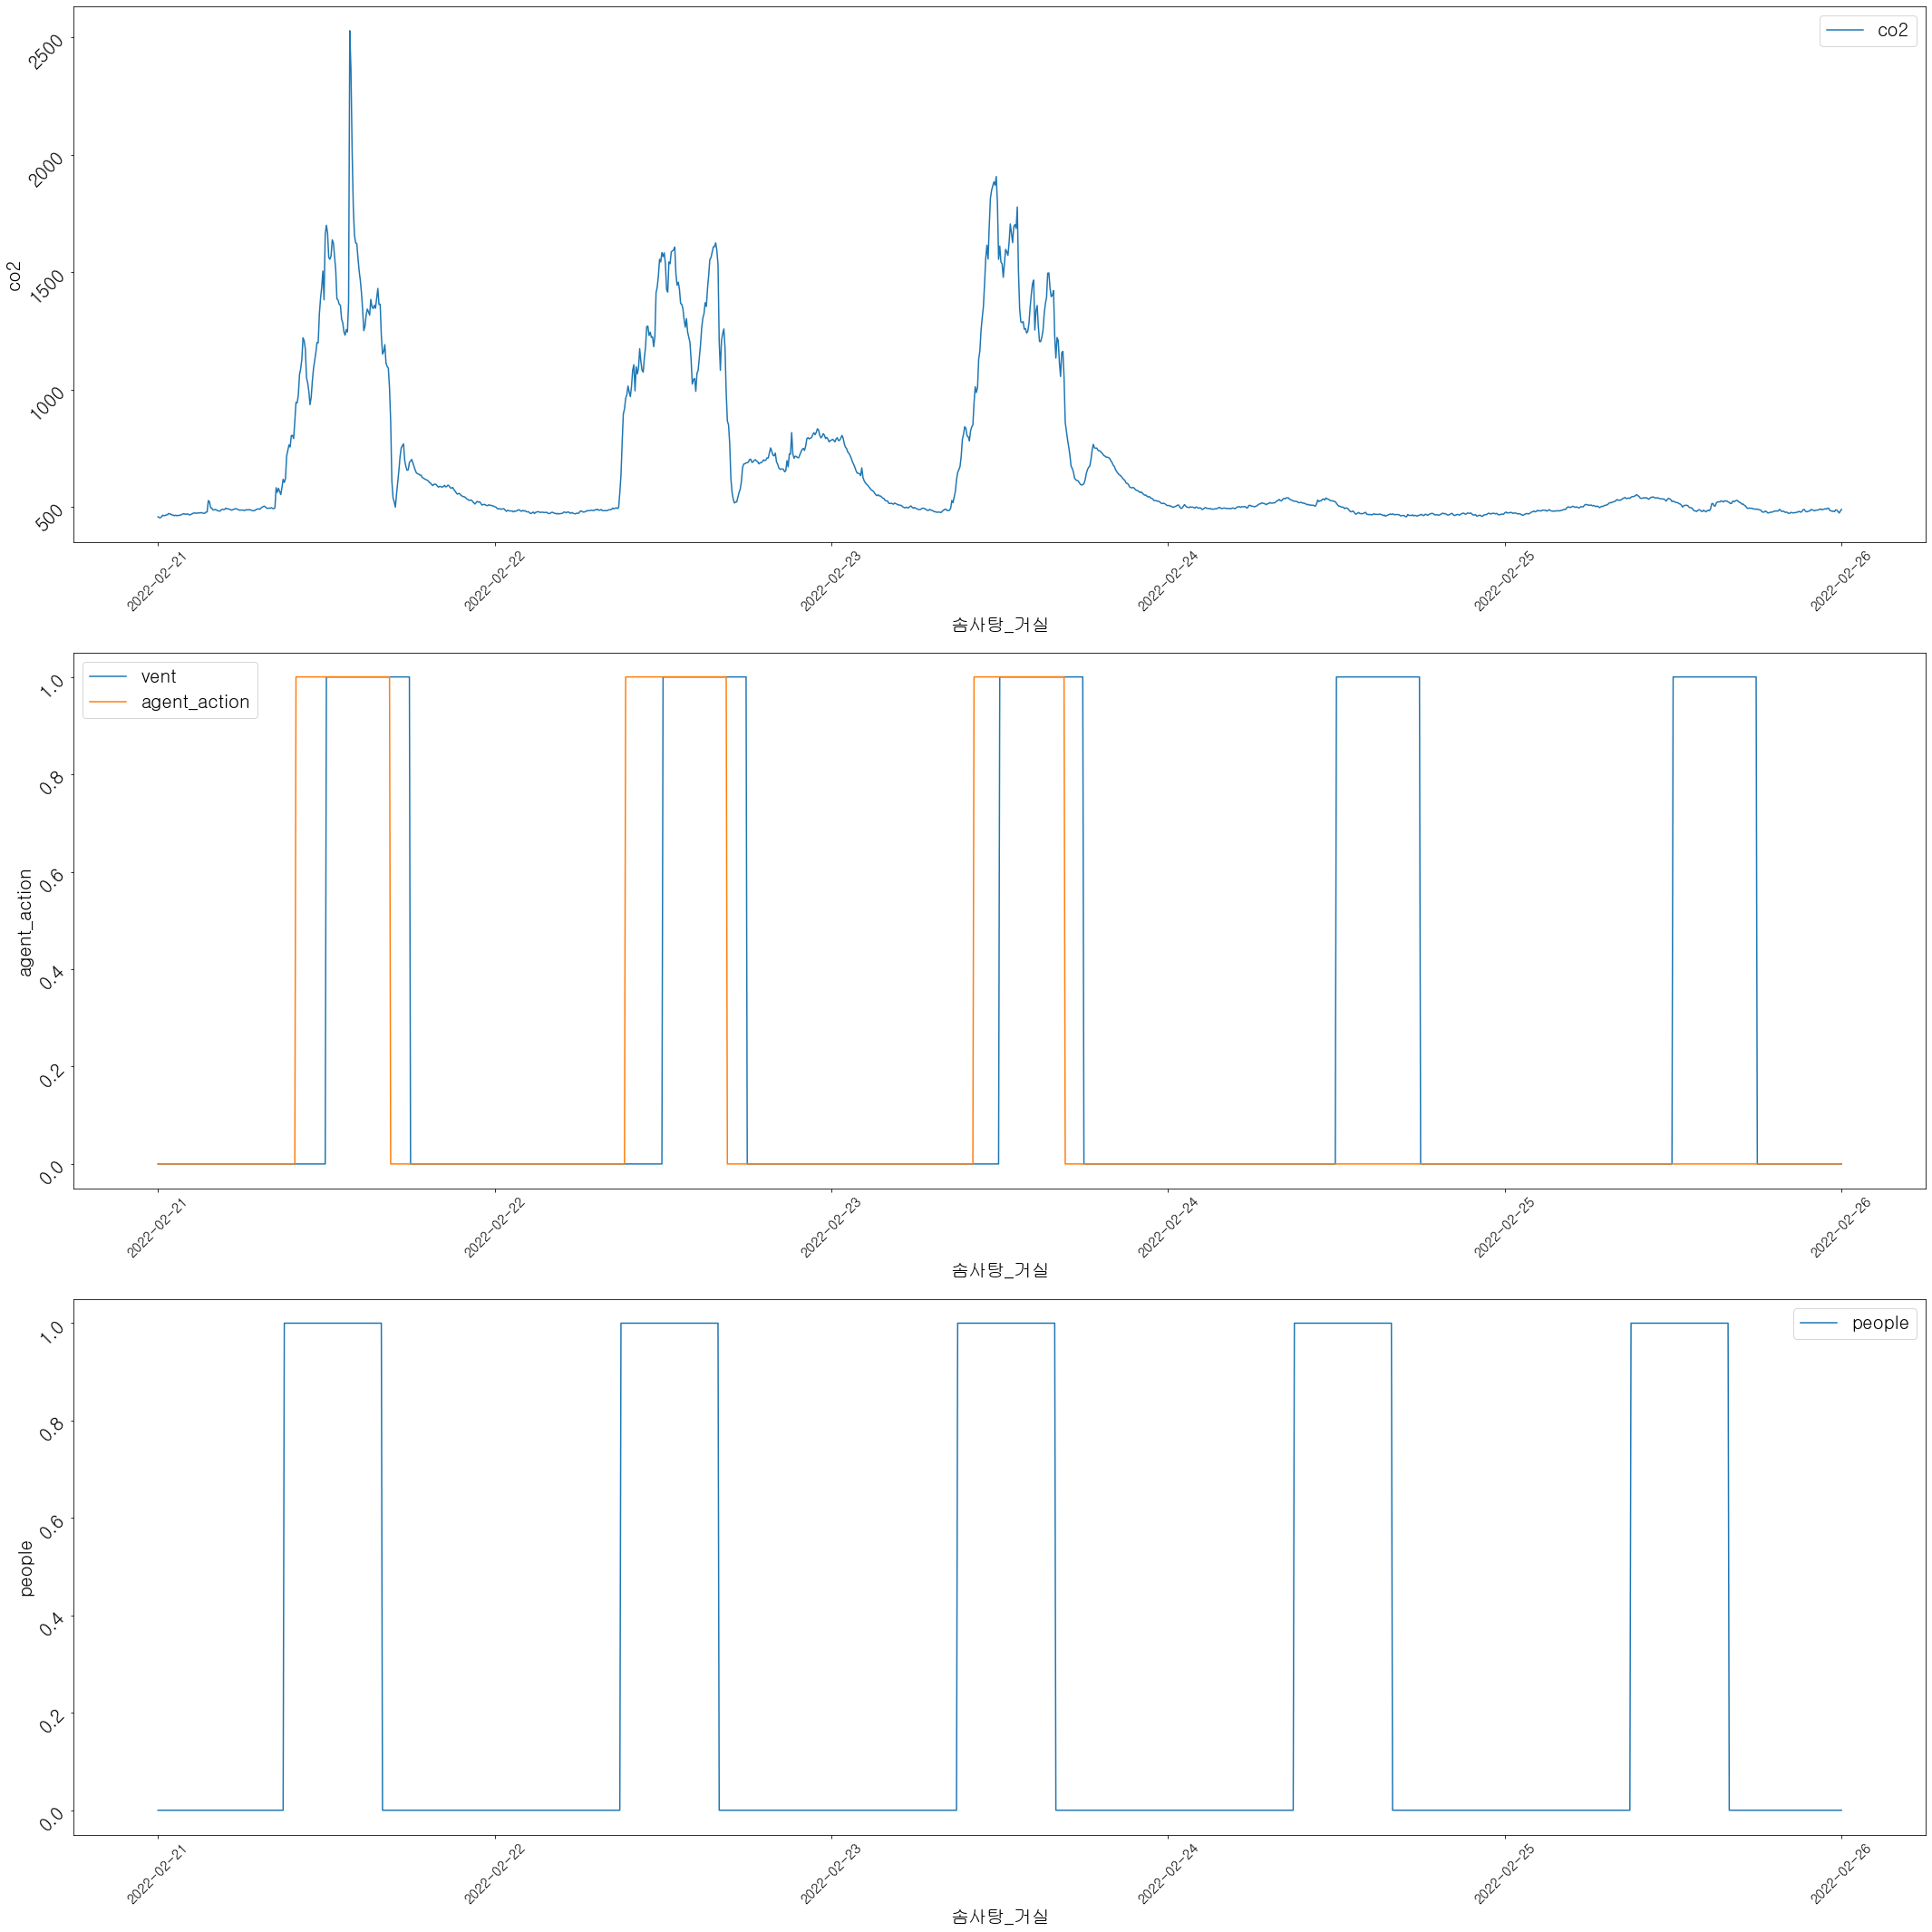

In [90]:
%%time
fig, axes = plt.subplots(3,1, figsize=(30,30))
# mean_by_date.loc[:,val].plot()
plt.rc('font', size=20)        # 기본 폰트 크기
# plt.rc('axes', labelsize=20)   # x,y축 label 폰트 크기
plt.rc('xtick', labelsize=15)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=20)  # y축 눈금 폰트 크기
plt.rc('legend', fontsize=20)  # 범례 폰트 크기
plt.rc('figure', titlesize=20)

axes[0].plot(temp_data['co2'], label = 'co2')
axes[0].set_ylabel('co2')
axes[0].legend()
axes[0].set_xlabel("솜사탕_거실")
axes[0].tick_params(labelrotation=45)
axes[0].xaxis.set_major_locator(dates.DayLocator())

axes[1].plot(temp_data['vent'], label = 'vent')
axes[1].set_ylabel('vent')
axes[1].legend()
axes[1].set_xlabel("솜사탕_거실")
axes[1].tick_params(labelrotation=45)
axes[1].xaxis.set_major_locator(dates.DayLocator())

axes[1].plot(temp_data['agent_action'], label = 'agent_action')
axes[1].set_ylabel('agent_action')
axes[1].legend()
axes[1].set_xlabel("솜사탕_거실")
axes[1].tick_params(labelrotation=45)
axes[1].xaxis.set_major_locator(dates.DayLocator())

axes[2].plot(temp_data['people'], label = 'people')
axes[2].set_ylabel('people')
axes[2].legend()
axes[2].set_xlabel("솜사탕_거실")
axes[2].tick_params(labelrotation=45)
axes[2].xaxis.set_major_locator(dates.DayLocator())

fig.tight_layout()